# Neural Network

by Atmam Al Faruq

In [1]:
# Memuat seluruh library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

/home/not/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/not/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/not/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/not/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

Memanggil dataset yang telah disiapkan oleh keras library. kemudian data dibagi kedalam data training dan testing

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_image, train_labels),(test_image, test_labels) = fashion_mnist.load_data()

Check data pada tiap array ( train_image, train_labels, test_image, test_labels)

In [3]:
print("Data train : "+str(len(train_image)))
print("Data train labels : "+str(len(train_labels)))
print("Data test : "+str(len(test_image)))
print("Data test labels : "+str(len(train_labels)))

Data train : 60000
Data train labels : 60000
Data test : 10000
Data test labels : 60000


Mengecek salah satu gambar, kemudian melakukan inspeksi terhadap gambar.

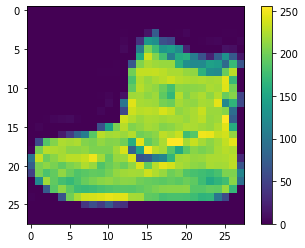

In [4]:
plt.imshow(train_image[0])
plt.colorbar()

Dapat dilihat gambar diatas memiliki rentan warna 0 - 255, dengan melihat indikator pada fungsi colorbar.

Selanjutnya, akan dieksplorasi lagi dengan memanggil dua puluh data

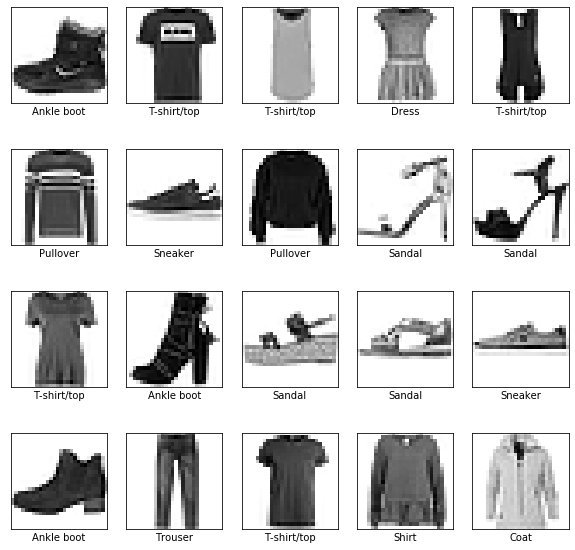

In [7]:
'''
dikarenakan format dalam train_labels berupa integer,
dibuatlah class_names untuk menerjemahkan nilai integer.
''' 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1) #disiapkan plot 4 baris 5 kolom, dengan indeks i + 1.
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_image[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

untuk mempermudah proses training karena nilai yang diperlukan adalah binary 0 - 1, 
maka nilai warna sebanyak 255 dilakukan normalisasi sehingga menjadi 0.0 - 1.0.

Hal ini dapat dilakukan dengan membagi dataset dengan 255.0

In [7]:
train_images = train_image / 255.0
test_images = test_image / 255.0

Membuat model dengan inputan gamabr 28x28, 
kemudian masuk kedalam hidden layer dengan node sebanyak 128 yang diproses dengan relu.
node tersebut akan disesuaikan kepada kelasa mana diantara 1 - 10.
probabilitas untuk menemukan class tersebut menggunakan softmax

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


model kemudian dicompile dan fit dengan data

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
model.fit(train_image,train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 12s 201us/sample - loss: 3.4402 - acc: 0.6833
Epoch 2/10
60000/60000 [==============================] - 12s 200us/sample - loss: 0.7591 - acc: 0.7303
Epoch 3/10
60000/60000 [==============================] - 12s 201us/sample - loss: 0.6124 - acc: 0.7767
Epoch 4/10
60000/60000 [==============================] - 12s 202us/sample - loss: 0.5621 - acc: 0.8021
Epoch 5/10
60000/60000 [==============================] - 12s 202us/sample - loss: 0.5355 - acc: 0.8179
Epoch 6/10
60000/60000 [==============================] - 12s 202us/sample - loss: 0.5227 - acc: 0.8255
Epoch 7/10
60000/60000 [==============================] - 12s 201us/sample - loss: 0.5115 - acc: 0.8288
Epoch 8/10
60000/60000 [==============================] - 12s 202us/sample - loss: 0.5055 - acc: 0.8352
Epoch 9/10
60000/60000 [==============================] - 12s 202us/sample - loss: 0.4992 - acc: 0.8363
Epoch 10/10
60000/60000 [==============================] - 12s 2

In [12]:
model.evaluate(test_image, test_labels, verbose=2)

10000/10000 - 1s - loss: 0.5633 - acc: 0.8086


[0.5633088676452637, 0.8086]

In [13]:
predictions = model.predict(test_image)

Setelah selesai, data test akan diprediksi dan melihat nilai kecenderungan tertinggi.

In [14]:
predictions[0]

array([4.5151965e-23, 7.8514429e-17, 3.9038599e-34, 5.3765128e-15,
       6.4671068e-37, 2.0560464e-02, 3.1687412e-30, 4.1638814e-02,
       8.0759562e-18, 9.3780077e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

Dapat dicek pada gambar dan melihat nilai distribusinya ke class berapa.

Text(0.5, 0, 'Ankle boot')

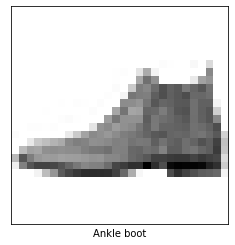

In [16]:
plt.imshow(test_image[0], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.xlabel(class_names[np.argmax(predictions[0])])

<BarContainer object of 10 artists>

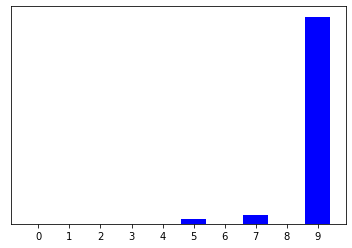

In [17]:
plt.xticks(range(10))
plt.yticks([])
plt.bar(range(10),predictions[0],color="blue")

Pada test_image[0] dapat dilihat nilai distribusinya mengarah pada class 9,
dimana 9 merupakan ankle boot.

Text(0.5, 0, 'Shirt')

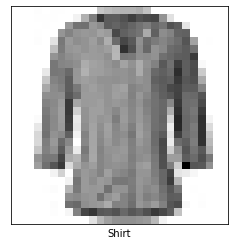

In [18]:
plt.imshow(test_image[4], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.xlabel(class_names[np.argmax(predictions[4])])

<BarContainer object of 10 artists>

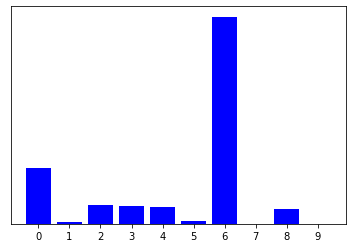

In [19]:
plt.xticks(range(10))
plt.yticks([])
plt.bar(range(10),predictions[4],color="blue")

<BarContainer object of 10 artists>

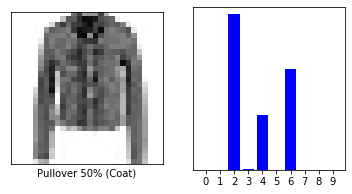

In [20]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.imshow(test_image[10], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[10])],
                                100*np.max(predictions[10]),
                                class_names[test_labels[10]]))

plt.subplot(1,2,2)
plt.xticks(range(10))
plt.yticks([])
plt.bar(range(10),predictions[10],color="blue")

In [21]:
train_image.shape

(60000, 28, 28)